In [2]:
import pandas as pd
import json

Ссылка на датасет: https://drive.google.com/drive/folders/1sg3FJkGfirXSJtFIgQvvxpMdAl_Zui51?usp=share_link

### Набор данных содержит вопросы и ответы на них, собранные из различных датасетов (SQuAD, T-REx, Natural Questions, MLQA, Zero Shot RE). 

Исходные датасеты содержат так называемые "single-hop" вопросы – это вопросы, на который можно ответить, извлекая информацию из одного фрагмента текста или одного шага логического вывода. 
Для ответа на такой вопрос достаточно обратиться к одному источнику данных или контексту.

Итоговые датасеты, которые будут применяться в годовом проекте, содержат multi-hop вопросы (вопросы, для ответа на которые требуется объединить информацию из нескольких различных источников или выполнить несколько шагов логического вывода), и ответы на эти вопросы. Multi-hop вопросы составлены из исходных single-hop вопросов.

### Набор данных содержит следующие файлы:
1. dev_test_singlehop_questions_v1.0.json – содержит id single-hop вопроса и сами вопросы текстом, разбитые по исходным датасетам (SQuAD, T-REx, Natural Questions, MLQA, Zero Shot RE).

2. musique_ans_v1.0_dev.jsonl, musique_ans_v1.0_test.jsonl, musique_ans_v1.0_train.jsonl – multihop вопросы с ответами только по вопросам, на которые есть ответ. 

3. musique_full_v1.0_dev.jsonl, musique_full_v1.0_test.jsonl, musique_full_v1.0_train.jsonl – полный датасет multihop вопросов, в том числе те, на которые нет ответа

### Для файлов из пунктов 2 и 3 структура датафрейма одинакова:
1. 'id' – string, содержит id вопроса

2. 'paragraphs' – list, содержит список словарей, которые содержат id, title и содержимое блока текста, который использовался моделью для ответа на заданный вопрос

3. 'question' – string, содержит multi-hop вопрос текстом  

4. 'question_decomposition', – list, содержит список словарей, которые содержат id single-hop вопроса, текст single-hop вопроса, answer на single-hop вопрос. Каждый Single-hop вопрос является составной частью multi-hop вопроса из колонки question.

5. 'answer' – object, содержит ответ на multi-hop вопрос

6. 'answer_aliases' – list, содержит альтернативные варианты ответа на multi-hop вопрос

7. 'answerable' – boolean, содержит True если модель смогла найти ответ на multi-hop вопрос, False если модель не смогла найти ответ. Актуально только для full датасетов, т к в ans датасетах answerable всегда = True.

##### Скорее всего, для целей проекта будем использовать датафрейм из файла musique_full_v1.0_train.jsonl – он содержит 39876 строк

In [3]:
json_file_path = 'dev_test_singlehop_questions_v1.0.json'

with open(json_file_path, 'r') as file:
    data = json.load(file)

singlehop_q = pd.json_normalize(data, sep='_')

print(singlehop_q.head())

                                              squad2  \
0  [{'id': '56be86cf3aeaaa14008c9078', 'question'...   

                                   natural_questions  \
0  [{'id': -3586117030178166108, 'question': 'wha...   

                                              zerore  \
0  [{'id': '9be6f528-b750-4cc4-9172-a16fc92a7614'...   

                                              mlqaen  \
0  [{'id': '4fe544ff62b6c9847f6065006cad02f374860...   

                                                trex  
0  [{'id': '49738ca4-a93b-4bca-8016-342592f40240'...  


In [4]:
singlehop_q

,squad2,natural_questions,zerore,mlqaen,trex
0,"[{'id': '56be86cf3aeaaa14008c9078', 'question'...","[{'id': -3586117030178166108, 'question': 'wha...",[{'id': '9be6f528-b750-4cc4-9172-a16fc92a7614'...,[{'id': '4fe544ff62b6c9847f6065006cad02f374860...,[{'id': '49738ca4-a93b-4bca-8016-342592f40240'...


In [5]:
squad2 = pd.json_normalize(singlehop_q['squad2'].explode())

In [6]:
squad2

,id,question
0,56be86cf3aeaaa14008c9078,Which artist did Beyonce marry?
1,56d43da72ccc5a1400d830c0,Who is Beyoncé married to?
2,56be8a583aeaaa14008c9094,What town did Beyonce go to school in?
3,56d443ef2ccc5a1400d830db,What city was Beyoncé's elementary school loca...
4,56bf8fc1a10cfb1400551175,Beyonce's first solo album in the U.S. with wh...
...,...,...
1117,573406d1d058e614000b6801,Who defeated Montcalm at Quebec?
1118,573407d7d058e614000b6814,What were requests made to British?
1119,573408ef4776f41900661757,When did the North American French and Indian ...
1120,573786b51c4567190057448e,What could be attributed to gravity accelerati...


In [7]:
natural_questions = pd.json_normalize(singlehop_q['natural_questions'].explode())

In [8]:
natural_questions

,id,question
0,-3586117030178166108,what episode in season 3 do jim and pam get to...
1,-8983137535639837730,monarch at the end of world war 2
2,-1931140672789454667,who did rob lowe play in the stand
3,8057227130837067256,who sings the country song light it up
4,3138409382759028706,where is the nile river located on the world map
...,...,...
1197,2191296244632588902,where did they film season 8 of the walking dead
1198,5775133890125619778,when did houston go to the american league
1199,-6045543986067197523,what is the setting of the book hoot
1200,-2767752731949092866,spyder from once upon a time in venice


In [9]:
zerore = pd.json_normalize(singlehop_q['zerore'].explode())

In [10]:
zerore

,id,question
0,9be6f528-b750-4cc4-9172-a16fc92a7614,What airport is Air Georgian part of?
1,61746348-25d6-48a7-9e66-9ea99807babd,What airport is Lion Air part of?
2,d748bc96-9d90-4ad7-a8cc-a92224ba7904,What airport is WestJet part of?
3,4578522a-d5aa-4de6-ac7d-da35323c50b7,What airport is Lufthansa CityLine part of?
4,27c1ead4-aa48-4870-b26f-a39199ede852,The designer for Southeast Library was?
...,...,...
970,b74030bd-fc8c-498f-887c-aa8a8615a9ec,What does Willemsbrug cross over?
971,ea2dcfbb-3816-485e-a6fc-daa10bee558b,What river does Wonnangatta River turn into?
972,f9d0dfd5-9a84-42de-aeba-588cbbdeecce,What team uses Dick's Sporting Goods Park?
973,5c2919bc-c591-4bac-8791-424841f988ac,What does Bargo River flow into?


In [11]:
mlqaen = pd.json_normalize(singlehop_q['mlqaen'].explode())

In [12]:
mlqaen

,id,question
0,4fe544ff62b6c9847f6065006cad02f37486008e,Where is 3% of Turkey located?
1,10f52025ac4f154c5107463acf010b73fc3afbb6,What is the per capita income of Milwaukee?
2,9fc3f8c6582caf030eaa93884ff4e835d5d71142,Which city hosted the Olymipics in 2007?
3,71eb796c1c7a19ec83a6dbfdfe09ded69ca2a169,What is one award that Jack Albertson has won?
4,07310df72371e2a6a2fa85e8c093dc6519b8af38,What do all objects focus on according to Kepl...
...,...,...
123,faac597fc74b128bdce56099f2e4f09957803d8d,What film was considered an astounding success?
124,9025827eb950c5993acdee4b1f391d359adaa32d,What was population of Navajo county in 2010?
125,eddeca14de97db617d903465da065b5966ad94db,Who came up with the basic definition for the ...
126,919170c6c4147d265c0ca5ce7136bed9958b34a1,How many people resided in Ermelo as of two ye...


In [13]:
trex = pd.json_normalize(singlehop_q['trex'].explode())

In [14]:
trex

,id,question
0,49738ca4-a93b-4bca-8016-342592f40240,Hurghada [SEP] capital of
1,b68f421b-ca23-40d9-a205-2ba7ae91558a,Sámara [SEP] country
2,b8f0d506-3faf-41d4-a510-93b6ddaba3ba,Ambelau [SEP] country
3,c8897a2d-c57d-4920-9eb4-a4e3b7da3bc3,Bordalba [SEP] located in the administrative t...
4,cc0f109f-3b14-4c42-9300-0742e0cf10ce,Jesus Varela [SEP] religion
...,...,...
2939,599ff0b7-e7ae-4025-8cad-8536689f54a6,WEDR [SEP] licensed to broadcast to
2940,68c45332-334a-4ce3-bddd-4baedc5c0318,Gmina Jordanów [SEP] located in the administra...
2941,a4885d52-eb55-4733-920b-9e0323ab5260,Canyon [SEP] located in the administrative ter...
2942,6173b4ed-4cc5-4889-b33a-491a78befa9d,Porsche [SEP] owned by


In [15]:
trex['question'][0]

'Hurghada [SEP] capital of'

In [16]:
musique_ans_v1_dev = pd.read_json('musique_ans_v1.0_dev.jsonl', lines=True)

In [17]:
musique_ans_v1_dev.loc[0:0]['paragraphs'][0]

[{'idx': 0,
  'title': "Grant's First Stand",
  'paragraph_text': 'Grant\'s First Stand is the debut album by American jazz guitarist Grant Green featuring performances by Green recorded and released on the Blue Note label in 1961. Earlier recordings made by Green for Blue Note were released as "First Session" in 2001.',
  'is_supporting': False},
 {'idx': 1,
  'title': 'List of show business families',
  'paragraph_text': 'Actress / director / singer Phylicia Rashād is the older sister of performer Debbie Allen, who is married to former NBA basketball player, Norm Nixon. Phylicia Rashād is the former spouse of both Victor Willis, former lead singer of the group Village People, and former NFL football player turned sportscaster, Ahmad Rashād. Phylicia and Ahmad Rashād are the parents of actress Condola Rashād.',
  'is_supporting': False},
 {'idx': 2,
  'title': 'Green',
  'paragraph_text': 'For the ancient Egyptians, green had very positive associations. The hieroglyph for green repres

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:>

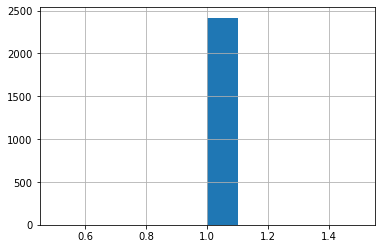

In [18]:
musique_ans_v1_dev['answerable'].hist()

In [19]:
musique_ans_v1_test = pd.read_json('musique_ans_v1.0_test.jsonl', lines=True)

In [20]:
musique_ans_v1_test

,id,paragraphs,question
0,2hop__55254_176500,"[{'idx': 0, 'title': 'Scarecrow (Oz)', 'paragr...",Who is the spouse of krusty the clown's voice ...
1,2hop__421982_677154,"[{'idx': 0, 'title': 'Ann Arbor, Michigan', 'p...",What team is Joumana Kidd's spouse on?
2,2hop__680867_826659,"[{'idx': 0, 'title': 'William Walker (diplomat...",What is the employer of William Walker part of?
3,2hop__528695_461025,"[{'idx': 0, 'title': 'That's All Right', 'para...",What is the record label of Legend of the Blac...
4,2hop__543484_790947,"[{'idx': 0, 'title': 'Sapphire Princess', 'par...",Where was Princess Charming's composer educated?
...,...,...,...
2454,3hop1__119591_102039_49195,"[{'idx': 0, 'title': 'The Hanging Tree', 'para...","Who was involved in the gold rush, in the coun..."
2455,3hop1__107161_5188_86687,"[{'idx': 0, 'title': 'Russian language', 'para...","When did the country where, despite being head..."
2456,3hop1__17192_78396_87555,"[{'idx': 0, 'title': 'Madrasa', 'paragraph_tex...","What was the first madrasa set up in India, by..."
2457,3hop1__131820_59747_55153,"[{'idx': 0, 'title': 'List of municipalities i...",When did Gone with the Wind premiere in the la...


In [21]:
musique_ans_v1_train = pd.read_json('musique_ans_v1.0_train.jsonl', lines=True)

In [22]:
musique_ans_v1_train

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable
0,2hop__482757_12019,"[{'idx': 0, 'title': 'Pakistan Super League', ...",When was the institute that owned The Collegia...,"[{'id': 482757, 'question': 'The Collegian >> ...",1960,[],True
1,2hop__129292_160863,"[{'idx': 0, 'title': 'The Spy in Black', 'para...",What year saw the creation of the region where...,"[{'id': 129292, 'question': 'In which state is...",1994,[],True
2,2hop__679261_120616,"[{'idx': 0, 'title': 'PolyGram Filmed Entertai...",When was the abolishment of the studio that di...,"[{'id': 679261, 'question': 'The Game >> distr...",1999,[],True
3,2hop__813857_127131,"[{'idx': 0, 'title': 'PopSister', 'paragraph_t...",When was the publisher of Crux launched?,"[{'id': 813857, 'question': 'Crux >> publisher...",1998,[],True
4,2hop__144408_215084,"[{'idx': 0, 'title': 'Jan Anton van der Baren'...",Jan Šindel's was born in what country?,"[{'id': 144408, 'question': 'What is Jan Šinde...",Czech Republic,"[CZE, cz, cze]",True
...,...,...,...,...,...,...,...
19933,4hop1__670964_344284_86983_516763,"[{'idx': 0, 'title': 'Alaska Purchase', 'parag...","What was the military branch of the president,...","[{'id': 670964, 'question': 'Verde Vallis >> i...",Union Army,[],True
19934,4hop1__803353_344284_86983_516763,"[{'idx': 0, 'title': 'Stura Vallis', 'paragrap...",The Stura Vallis is the same type of geographi...,"[{'id': 803353, 'question': 'Stura Vallis >> i...",Union Army,[],True
19935,4hop1__228811_344284_86983_516763,"[{'idx': 0, 'title': 'Valley of Ten Thousand S...",The Tyras Vallis is the same type of geographi...,"[{'id': 228811, 'question': 'Tyras Vallis >> i...",Union Army,[],True
19936,4hop1__495205_206801_524406_670567,"[{'idx': 0, 'title': 'List of World Heritage S...",The author of the Eddie & the Gang with No Nam...,"[{'id': 495205, 'question': 'Eddie & the Gang ...",UNESCO World Heritage Site,"[World Heritage Site, World heritage site, Wor...",True


In [23]:
musique_full_v1_dev = pd.read_json('musique_full_v1.0_dev.jsonl', lines=True)

In [24]:
musique_full_v1_dev

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable
0,2hop__153573_109006,"[{'idx': 0, 'title': 'History of the Internet'...",Who developed the eponymous character from the...,"[{'id': 153573, 'question': 'What series is Mi...",Walt Disney,[],False
1,4hop1__129721_32392_823060_610794,"[{'idx': 0, 'title': 'Zubly Cemetery', 'paragr...",What county is the city that shares a border w...,"[{'id': 129721, 'question': 'In which state is...",Richland County,[],False
2,3hop2__655849_223623_162182,"[{'idx': 0, 'title': 'Broward Correctional Ins...",In what region of the country containing A Lướ...,"[{'id': 655849, 'question': 'A Lưới >> country...",South Central Coast,[],False
3,3hop1__241001_568433_47686,"[{'idx': 0, 'title': 'Šķirotava', 'paragraph_t...",Where do Greyhound buses leave from in the cit...,"[{'id': 241001, 'question': 'Arna Selznick >> ...",Toronto Coach Terminal,[],True
4,2hop__231890_595414,"[{'idx': 0, 'title': 'Union territory', 'parag...",Which county does Lloyd Dane's birthplace belo...,"[{'id': 231890, 'question': 'Lloyd Dane >> pla...",Miller County,"[Miller County, Missouri]",True
...,...,...,...,...,...,...,...
4829,2hop__131275_72870,"[{'idx': 0, 'title': 'American Idol', 'paragra...",Who did the state where Christian Science Plea...,"[{'id': 131275, 'question': 'Which state is Ch...",Hillary Clinton,[],False
4830,4hop1__512794_508773_85832_745702,"[{'idx': 0, 'title': 'The Joker King', 'paragr...",What's the name of the son of the Italian navi...,"[{'id': 512794, 'question': 'Armando Robles >>...",Sebastian Cabot,[],False
4831,2hop__130404_59180,"[{'idx': 0, 'title': 'Fast Times at Ridgemont ...",What date saw the writing of the song where th...,"[{'id': 130404, 'question': 'What is the name ...","May 21, 1979",[],False
4832,3hop1__129675_39743_24526,"[{'idx': 0, 'title': 'Russkaya Station', 'para...",What is the average daytime temperature in the...,"[{'id': 129675, 'question': 'In which state is...",upper 40s–lower 50s °F,[],False


In [25]:
musique_full_v1_test = pd.read_json('musique_full_v1.0_test.jsonl', lines=True)

In [26]:
musique_full_v1_test

,id,paragraphs,question
0,2hop__2791_2785,"[{'idx': 0, 'title': '999 (emergency telephone...",What is the result of the laws of cause and ef...
1,2hop__797420_847204,"[{'idx': 0, 'title': 'Jersey Shore (TV series)...",Who's the spouse of the cast member of Marigol...
2,4hop1__398821_611797_580996_425305,"[{'idx': 0, 'title': 'Kennedy Space Center', '...",What county is the town that shares a border w...
3,2hop__20491_429566,"[{'idx': 0, 'title': 'Brestir Sigmundsson', 'p...",Who is the spouse of Humphrey Gilbert's half-b...
4,2hop__82361_86508,"[{'idx': 0, 'title': 'The Fresh Prince of Bel-...",Who is the actor that plays the main character...
...,...,...,...
4913,3hop1__157807_19788_19761,"[{'idx': 0, 'title': 'Red-bellied black snake'...",Which missionary helped spread the religion wi...
4914,3hop1__26222_36635_87083,"[{'idx': 0, 'title': 'Chrysler Pacifica (1999 ...",Who hold veto power in the organization in whi...
4915,2hop__129784_40413,"[{'idx': 0, 'title': 'Tenochtitlan', 'paragrap...",What percentage of Australian pears are grown ...
4916,2hop__104350_8583,"[{'idx': 0, 'title': 'Slavs', 'paragraph_text'...",Who did the Slavs have contact with in the cou...


In [27]:
musique_full_v1_train = pd.read_json('musique_full_v1.0_train.jsonl', lines=True)

In [28]:
musique_full_v1_train.columns

Index(['id', 'paragraphs', 'question', 'question_decomposition', 'answer',
       'answer_aliases', 'answerable'],
      dtype='object')

In [29]:
musique_full_v1_train

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable
0,2hop__42543_20093,"[{'idx': 0, 'title': 'All Things in Time', 'pa...",What year did the writer of Crazy Little Thing...,"[{'id': 42543, 'question': 'who wrote crazy li...",1991,[],False
1,2hop__269805_135710,"[{'idx': 0, 'title': 'Milton F. Pavlic', 'para...",What is the country where Nissedal is located ...,"[{'id': 269805, 'question': 'Nissedal >> count...",north,"[North, N]",True
2,2hop__568389_161223,"[{'idx': 0, 'title': 'Bugabula', 'paragraph_te...",What is the highest point in the country where...,"[{'id': 568389, 'question': 'Bugabula >> count...","1,400 metres",[],True
3,2hop__131693_45439,"[{'idx': 0, 'title': 'United States Declaratio...",Who from the state with the Routzahn-Miller Fa...,"[{'id': 131693, 'question': 'Which state is Ro...",Charles Carroll,[],True
4,2hop__150985_444333,"[{'idx': 0, 'title': 'Journal of Geographical ...",Who founded the publisher of Journal of Media ...,"[{'id': 150985, 'question': 'What is the name ...",George Routledge,[],False
...,...,...,...,...,...,...,...
39871,4hop1__104663_221169_833580_61459,"[{'idx': 0, 'title': 'Felix von Heijden', 'par...","When did Italy enter the conflict, involving A...","[{'id': 104663, 'question': 'Which country's c...",1915,[],True
39872,3hop1__136013_146352_29562,"[{'idx': 0, 'title': 'Bizet metro station', 'p...",How many people make up the executive branch s...,"[{'id': 136013, 'question': 'Whom is Landau's ...",eight,[],False
39873,2hop__159395_56424,"[{'idx': 0, 'title': 'Camair-Co', 'paragraph_t...",Who was the king of Cameroon's main ally in 1306?,"[{'id': 159395, 'question': 'Who is Cameroon's...",Philip IV,[],True
39874,3hop1__747740_295863_534758,"[{'idx': 0, 'title': 'Pesanggrahan, South Jaka...",What is the capital of the county next to the ...,"[{'id': 747740, 'question': 'Roaring Brook Tow...",Stroudsburg,"[Stroudsburg, Pennsylvania]",False


In [30]:
musique_full_v1_train.dtypes

id                        object
paragraphs                object
question                  object
question_decomposition    object
answer                    object
answer_aliases            object
answerable                  bool
dtype: object

In [31]:
for column in musique_full_v1_train.columns:
    print(f"{column}, {musique_full_v1_train[column][0]}")
    print("--------------------------------------------------")

id, 2hop__42543_20093
--------------------------------------------------
paragraphs, [{'idx': 0, 'title': 'All Things in Time', 'paragraph_text': 'All Things in Time is an album by American R&B singer Lou Rawls, released in June 1976 on the Philadelphia International Records label. Coming after a career lull in the years immediately preceding, "All Things in Time" was Rawls\' first album for PIR; at the time he was the first artist to sign with PIR after having already enjoyed a substantial recording career and chart success with other record labels. The album includes Rawls\' most famous hit song "You\'ll Never Find Another Love Like Mine".', 'is_supporting': False}, {'idx': 1, 'title': "Goin' Out of My Head", 'paragraph_text': "``Goin 'Out of My Head ''is a song written by Teddy Randazzo and Bobby Weinstein, initially recorded by Little Anthony & the Imperials in 1964. Randazzo, a childhood friend of the group, wrote the song especially for them, having also supplied the group with t